In [1]:
# configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# carga do dataset
wine = load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names)
dataset['target'] = wine.target

dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# preparacao dos dados

# separacao em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13]
y = array[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# criando os folds para a validacao cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

KNN: 0.675238 (0.087929)
CART: 0.880476 (0.055183)
NB: 0.971429 (0.047380)
SVM: 0.683333 (0.078282)


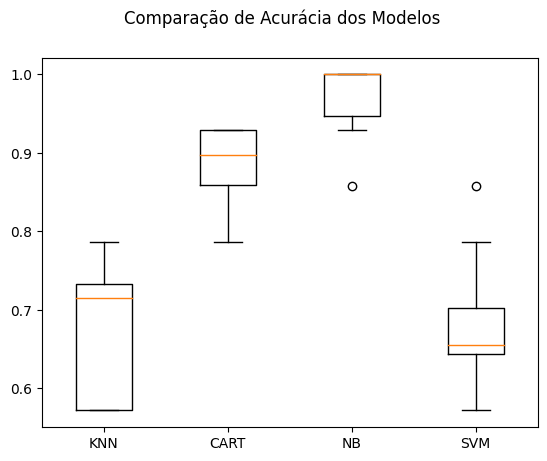

In [4]:
# modelagem

# definindo uma seed global para esta celula de codigo
np.random.seed(7)

# listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# preparando os modelos e adcionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot de comparacao dos modelos
fig = plt.figure()
fig.suptitle('Comparação de Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [5]:
# criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# fazendo as previsoes com o conjunto de teste
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))

1.0
